1.The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features.Split the data in to train and test sets.

In [12]:
import pandas as pd
lt=pd.read_csv('LetterData.csv',sep=";")

In [13]:
lt

,target,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9
5,G,2,1,2,2,1,7,7,6,5,6,6,10,2,9,4,9
6,G,3,7,4,5,3,6,5,5,6,6,6,9,2,9,3,7
7,C,3,6,5,4,1,6,8,6,10,7,7,12,1,7,4,9
8,G,5,7,6,5,3,6,7,6,6,10,8,8,2,9,5,9
9,C,5,8,6,6,2,6,7,7,10,6,6,15,1,8,4,9


In [14]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [16]:
train,test=train_test_split(lt,test_size=0.3,random_state=4)
print(train.shape)
print(test.shape)

(1056, 17)
(453, 17)


In [17]:
train_x=train.iloc[:,1:]
train_y=train.iloc[:,0]
test_x=test.iloc[:,1:]
test_y=test.iloc[:,0]

In [18]:
train_x.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
237,3,3,5,5,2,8,6,7,8,6,5,10,1,8,6,11
1202,3,6,4,4,1,5,8,6,10,6,7,12,1,7,4,8
1312,4,7,5,5,3,6,7,6,8,5,6,13,1,6,5,9
1064,5,9,5,6,3,6,7,6,7,10,8,10,2,9,4,9
38,6,10,8,8,8,9,8,6,3,5,7,10,9,8,5,9


In [19]:
train_y.head()

237     G
1202    C
1312    C
1064    G
38      G
Name: target, dtype: object

2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners.Use decision tree classifier as the base classifier.

In [32]:
from sklearn.ensemble import AdaBoostClassifier
acc=[]
for i in range(1,16):
    model=AdaBoostClassifier(n_estimators=i,random_state=7)
    model.fit(train_x,train_y)
    y_pred=model.predict(test_x)
    acc.append(metrics.accuracy_score(test_y,y_pred))


In [33]:
acc

[0.7350993377483444,
 0.7924944812362031,
 0.7969094922737306,
 0.8388520971302428,
 0.8631346578366446,
 0.8322295805739515,
 0.8498896247240618,
 0.8675496688741722,
 0.8520971302428256,
 0.8543046357615894,
 0.8984547461368654,
 0.8830022075055187,
 0.8830022075055187,
 0.9072847682119205,
 0.9116997792494481]

In [29]:
acc.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

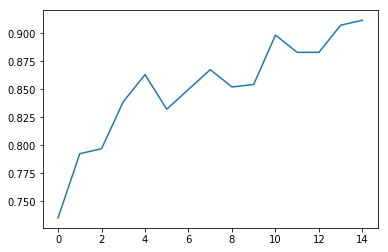

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(len(acc)),acc)

3.Repeat step2 with max_depth set as 2

In [36]:
import sklearn.tree
from sklearn.ensemble import AdaBoostClassifier

In [42]:
acc2=[]
for i in range(1,16):
    model=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1),n_estimators=i,random_state=7)
    model.fit(train_x,train_y)
    y_pred=model.predict(test_x)
    acc2.append(metrics.accuracy_score(test_y,y_pred))

In [43]:
acc2

[0.7350993377483444,
 0.7924944812362031,
 0.7969094922737306,
 0.8388520971302428,
 0.8631346578366446,
 0.8322295805739515,
 0.8498896247240618,
 0.8675496688741722,
 0.8520971302428256,
 0.8543046357615894,
 0.8984547461368654,
 0.8830022075055187,
 0.8830022075055187,
 0.9072847682119205,
 0.9116997792494481]

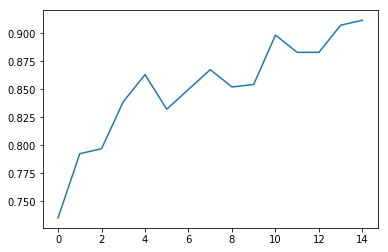

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(len(acc2)),acc2)

In [48]:
import sklearn.metrics 
z=model.predict_proba(test_x)
print(metrics.log_loss(test_y, z))

0.569659389101042
